<a href="https://colab.research.google.com/github/bryandaetz1/Apartment_Rent_Prices/blob/master/Apartment_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bryandaetz1/Apartment_Rent_Prices/master/oakland_apartment_data.csv')

In [3]:
df.shape

(3240, 8)

In [4]:
df.head()

,Title,Address,Bedrooms,Bathrooms,Rent,Square Footage,Availability,Amenities
0,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875 - 2,995",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
1,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
2,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
3,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
4,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."


In [5]:
df.isna().sum()

Title               0
Address             0
Bedrooms            0
Bathrooms           2
Rent                0
Square Footage    107
Availability        0
Amenities         155
dtype: int64

In [6]:
#replacing null values in amenities column with empty strings, will address null values in bathrooms and square footage columns later
df['Amenities'].fillna('', inplace = True)

#Cleaning Bedroom and Bathroom Columns

In [7]:
df.Bedrooms.value_counts()

1 Bed     1341
2 BRs     1120
Studio     474
3 BRs      227
4 BRs       54
5 BRs       13
6 BRs        8
7 BRs        1
8 BRs        1
13 BRs       1
Name: Bedrooms, dtype: int64

In [8]:
df.Bathrooms.value_counts()

1 Bath       2057
2 Baths       949
2Â½ Baths      98
1Â½ Baths      69
3 Baths        49
0Â½ Baths       7
4Â½ Baths       4
5Â½ Baths       1
10 Baths        1
3Â½ Baths       1
17 Baths        1
4 Baths         1
Name: Bathrooms, dtype: int64

In [9]:
# replacing Studio with 0 bedrooms and removing all non-digits from Bedrooms column
df.Bedrooms = pd.to_numeric(df.Bedrooms.str.replace('Studio','0').str.replace('\D','', regex = True))

# converting fractions to decimals and removing all letters from Bathrooms column
df.Bathrooms = pd.to_numeric(df.Bathrooms.str.replace('Â½','.5').str.replace('[a-zA-z]','', regex = True).str.strip())


In [10]:
#inspecting rows where number of bathrooms is missing
df.loc[df['Bathrooms'].isna()]

,Title,Address,Bedrooms,Bathrooms,Rent,Square Footage,Availability,Amenities
2458,Aqua Via,"125 2nd St, Oakland, CA 94607 â€“ Jack London ...",0,NaN,"$2,598 - 5,359",790 Sq Ft,26-Oct,"Air Conditioning in Every Home, Award-Winning ..."
2459,Aqua Via,"125 2nd St, Oakland, CA 94607 â€“ Jack London ...",0,NaN,"$2,598 - 5,359",790 Sq Ft,26-Oct,"Air Conditioning in Every Home, Award-Winning ..."


In [11]:
# only 2 apartments don't have bathrooms listed and both are studios, assuming this means 1 Bathroom
df['Bathrooms'].fillna(1, inplace = True)

# Extracting Features from Address Column

In [12]:
#extracting city from address and saving it as a new column
df['City'] = df.Address.apply(lambda x: x.split(', CA')[0]).apply(lambda x: x.split(',')[-1]).str.strip()

In [13]:
df['City'].value_counts()

Oakland        2446
Berkeley        333
Emeryville      311
Alameda          99
San Leandro      37
Piedmont         14
Name: City, dtype: int64

In [14]:
#extracting zip code from address and storing this as a new column
df['Zip_Code'] = df.Address.apply(lambda x: x.split('CA')[-1]).apply(lambda x: x.split('â€“')[0]).str.strip()

In [15]:
df['Zip_Code'].value_counts()

94612    1347
94608     374
94609     326
94607     241
94704     217
94606     150
94611     134
94501      87
94610      62
94702      39
94705      38
94577      37
94619      34
94601      28
94605      24
94621      21
94703      18
94602      18
94709      17
94502      12
94618       7
94603       5
94710       3
94708       1
Name: Zip_Code, dtype: int64

In [16]:
#extracting neighborhood from address and storing this as a new column
df['Neighborhood'] = df.Address.apply(lambda x: x.split('â€“')[-1]).str.strip()

In [17]:
#finding neighborhoods that appear most frequently repeatedly
top_neighborhoods = df['Neighborhood'].value_counts()
top_neighborhoods[top_neighborhoods > 50]

Lakeside              669
Uptown Oakland        346
Emeryville            294
Westlake              268
Jack London Square    172
South Berkeley        146
Pill Hill             139
Oakland               139
Shafter               123
West Alameda           68
Elmwood                67
Mosswood               63
West Oakland           61
Piedmont Avenue        52
Name: Neighborhood, dtype: int64

#Cleaning Rent Column

In [18]:
#testing to see how many listings have a range for rent 
print('Number of Listings with Rent Range:', len(df[df['Rent'].str.contains('-')]))
print('Number of Listings with No Rent Listed:', len(df[df['Rent'].str.contains('Call')]))


Number of Listings with Rent Range: 1049
Number of Listings with No Rent Listed: 273


In [19]:
# dropping rows where rent isn't listed
df.drop(df.loc[df['Rent'].str.contains('Call')].index, axis = 0, inplace = True)

#removing dollar signs, commas and / Person from rent column
df['Rent'] = df['Rent'].str.replace('$','').str.replace(',','').str.replace('/ Person','')

In [20]:
df.shape

(2967, 11)

In [21]:
# creating new column with average rents for listings where there is a rent range, and the rent amount for listings with just one rent amount
avg_rent = []
for x in df['Rent']:
  if '-' in x:
    avg = round((int(x.split('-')[0]) + int(x.split('-')[-1])) / 2)  #rounding up since rent prices generally don't include decimals
    avg_rent.append(avg)
  else:
    avg_rent.append(x)

df['Avg_Rent'] = avg_rent

#Cleaning Square Footage Column

In [22]:
df.isna().sum()

Title               0
Address             0
Bedrooms            0
Bathrooms           0
Rent                0
Square Footage    103
Availability        0
Amenities           0
City                0
Zip_Code            0
Neighborhood        0
Avg_Rent            0
dtype: int64

In [23]:
#removing letters, commas and extra whitespace from square footage column
df['Square Footage'] = df['Square Footage'].str.replace('[a-zA-z]','',regex = True).str.replace(',','').str.strip()

In [24]:
# creating new column with average square footage for listings where there is a sqft range, and the square footage for listings with just one sqft amount
avg_sqft = []
for x in df['Square Footage']:
  if '-' in str(x):
    avg = round((int(x.split('-')[0]) + int(x.split('-')[-1])) / 2)
    avg_sqft.append(avg)
  else:
    avg_sqft.append(x)
df['Avg_Sqft'] = pd.to_numeric(avg_sqft)


In [25]:
df['Avg_Sqft'].tail(25)

3215     432.0
3216     432.0
3217       NaN
3218     432.0
3219     666.0
3220     785.0
3221       NaN
3222       NaN
3223     470.0
3224    1400.0
3225    1063.0
3226     432.0
3227       NaN
3228    1750.0
3229       NaN
3230       NaN
3231     800.0
3232    1150.0
3233     930.0
3234       NaN
3235       NaN
3236     885.0
3237     715.0
3238     885.0
3239     700.0
Name: Avg_Sqft, dtype: float64

In [26]:
#getting a sense of how many missing square footage values there are for each bedroom size
df.loc[df['Avg_Sqft'].isna()]['Bedrooms'].value_counts()

1    42
2    26
3    21
4     6
0     6
7     1
6     1
Name: Bedrooms, dtype: int64

In [27]:
#getting average square footage by bedroom size
averages = round(df.groupby('Bedrooms', as_index = False)['Avg_Sqft'].mean())
averages

,Bedrooms,Avg_Sqft
0,0,501.0
1,1,695.0
2,2,1037.0
3,3,1376.0
4,4,1710.0
5,5,2102.0
6,6,1926.0
7,7,NaN
8,8,2976.0
9,13,6272.0


In [28]:
#replacing null values in Avg_Sqft column with average square footage for the same bedroom size
for i in range (0,7):
  df.loc[(df['Avg_Sqft'].isna()) & (df['Bedrooms'] == i),'Avg_Sqft'] = averages['Avg_Sqft'][i]

In [29]:
# dropping rows where bedroom size is 7 or higher, these are outliers anyway and it will address the missing square footage value for the one 7 bedroom home/apartment that we have
df.drop(df.loc[df['Bedrooms'] >= 7].index, axis = 0, inplace = True)

# NLP Model for Amenities Column
Trying to see if training an NLP model using the bag of words approach will help gain insight on useful features to extract from the Amenities column.

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

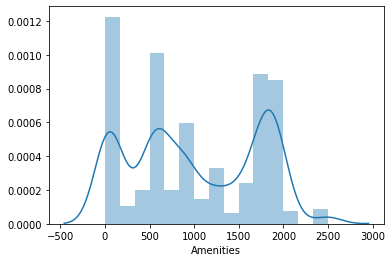

In [31]:
#plotting length of amenities descriptions
length = df['Amenities'].str.len()
sns.distplot(length)
plt.show()

In [32]:
#getting set of English stopwords
stopword_set = set(stopwords.words('english'))

#NLP processing
lemma = WordNetLemmatizer()

In [33]:
#clean the raw text
amenities_text = []
for amenity in df['Amenities']:
  text = re.sub('[^a-zA-z]'," ", str(amenity))
  text = text.lower()
  text = word_tokenize(text, language = 'english')
  text = [lemma.lemmatize(word) for word in text if(word) not in stopword_set]
  text = ' '.join(text)
  amenities_text.append(text)

amenities_text[:10]

['smoke free community air conditioning bicycle storage brand new luxury living controlled access courtyard firepit dog washing station elevator fiber internet gourmet kitchen home full size washer dryer individual climate control minute great shopping amp dining motorized parking lift motorized parking lift noise reducing dual pane window noise reducing insulated dual pane window package locker pet allowed pet welcome weight restriction plank flooring quartz countertop quartz counter top tile backsplash rooftop terrace barbecue rooftop terrace downtown view secure bike parking stainless steel appliance sweeping view oakland hill sweeping view san francisco view sf oakland deposit monthly pet rent lb weight limit pet limit built unit story month month month month month month month month month month month month month month month month maintenance site online service pet care pet washing station public transportation elevator multi use room roof terrace sundeck courtyard grill patio gril

In [34]:
#create the bag of words model
cv = CountVectorizer(max_features = 1500)
amenities = cv.fit_transform(amenities_text).toarray()

#covert amenities to dataframe
amenities = pd.DataFrame(amenities, columns = cv.get_feature_names())
amenities.head()

,ac,academic,accent,acceptance,access,accessible,accommodate,accommodation,ace,acre,across,active,activity,ada,adam,additional,adjacent,aging,air,airy,alameda,alarm,alcove,alert,alexa,alfred,allowed,alternate,amazing,amazon,amen,ameni,ameniti,amenitie,amenity,amp,ample,amtrak,apartment,apartmentratings,...,waste,watch,water,waterfront,way,webpass,website,weight,welcome,well,wet,wheelchair,whirlpool,whirpool,white,whole,wi,wide,wifi,wii,william,window,wine,winning,wired,wireless,within,wood,woodstyle,woof,work,working,workshop,yar,yard,year,yelena,yoga,zen,zipcar
0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#setting target variable and independent variables and splitting dataset for NLP model
y = pd.to_numeric(df['Avg_Rent'])
X = pd.concat([amenities.reset_index(drop = True), df['Bedrooms'].reset_index(drop = True)], axis = 1, sort = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [36]:
# choosing to use random forest regression model because it's easy to see feature importances
rf = RandomForestRegressor(n_estimators = 100)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [37]:
#calculating root mean squared error 
print('Random Forest Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

#calulating R**2 score
print('Random Forest R**2 Score:', r2_score(y_test, pred))

Random Forest Root Mean Squared Error: 612.3400690943187
Random Forest R**2 Score: 0.7713720475745787


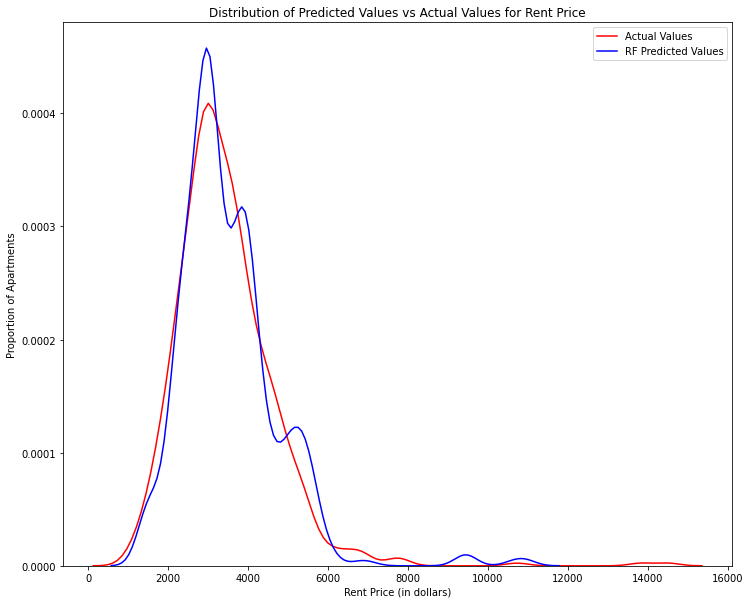

In [38]:
# visualizing distribution of predicted values vs actual values for SalePrice
plt.figure(figsize = (12,10))

ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values')
ax2 = sns.distplot(pred, hist = False, color = 'b', label = 'RF Predicted Values')



plt.title('Distribution of Predicted Values vs Actual Values for Rent Price')
plt.xlabel('Rent Price (in dollars)')
plt.ylabel('Proportion of Apartments')

plt.show()
plt.close()

In [39]:
#getting feature importances
feature_importances = ({'Name':[],
                        'Score':[]})

for name, score in zip(X.columns, rf.feature_importances_):
  feature_importances['Name'].append(name)
  feature_importances['Score'].append(score)

feature_importances = pd.DataFrame(feature_importances).sort_values(['Score'], ascending = False)

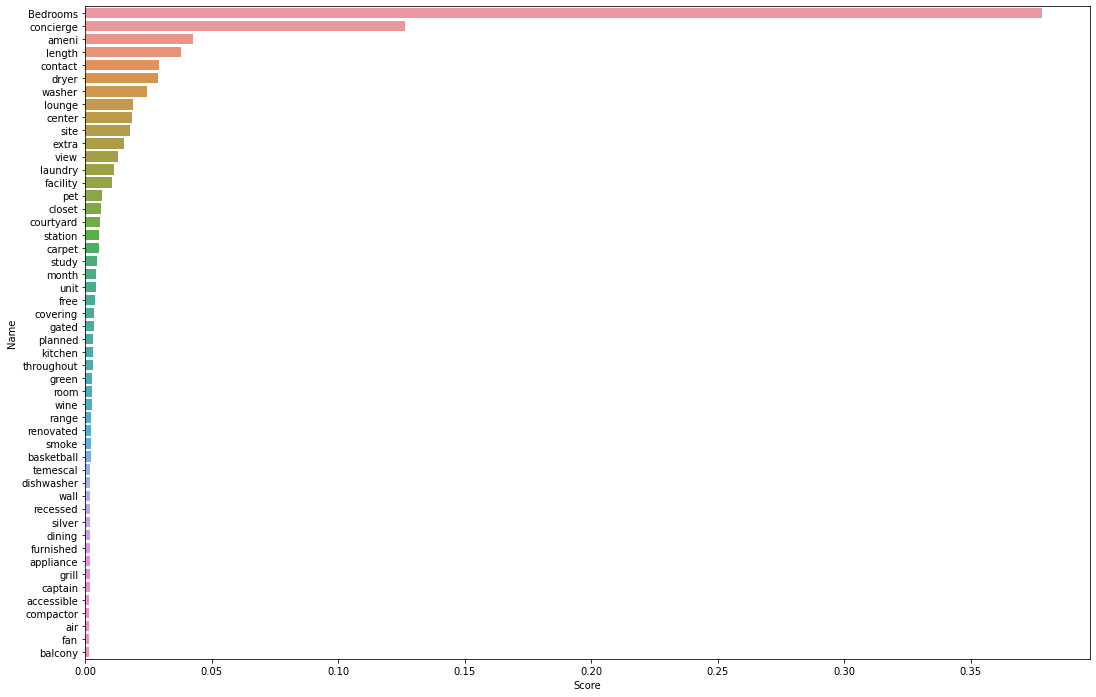

In [40]:
#plotting feature importances
f, ax = plt.subplots(figsize = (18,12))
sns.barplot(x = 'Score', y = 'Name', data = feature_importances.head(50), orient = "h")
plt.show()

#Extracting Features from Amenities Column
Used insight gained from NLP model to extract new features from the amenities column

In [41]:
df['Concierge'] = df.Amenities.apply(lambda x: 1 if 'concierge' in x.lower() else 0)  #whether or not apartment complex has a concierge

df['Lounge'] = df.Amenities.apply(lambda x: 1 if 'lounge' in x.lower() else 0)  #whether or not apartment complex has a lounge

df['A/C'] = df.Amenities.apply(lambda x: 1 if 'air conditioning' in x.lower() or 'a/c' in x.lower() else 0)  #whether or not apt/house has air conditioning

df['Smoke Free'] = df.Amenities.apply(lambda x: 1 if 'smoke free' in x.lower() else 0)  #whether or not the apartment complex is smoke free

df['Pets Allowed'] = df.Amenities.apply(lambda x: 1 if 'pets allowed' in x.lower() or 'pets welcome' in x.lower() or 'dogs allowed' in x.lower() or 'cats allowed' in x.lower() else 0) #whether or not the apartment complex allows pets

df['Pool'] = df.Amenities.apply(lambda x: 1 if 'pool' in x.lower() else 0)  #whether or not the apartment complex has a pool

df['Gym'] = df.Amenities.apply(lambda x: 1 if 'gym' in x.lower() or 'fitness center' in x.lower() or 'yoga studio' in x.lower() else 0)  #whether or not the apartment complex has a gym/fitness center/yoga studio

df['Laundry'] = df.Amenities.apply(lambda x: 1 if 'laundry' in x.lower() or 'washer' in x.lower() or 'dryer' in x.lower() else 0) #whether or not laundry is mentioned in the list of amenities

df['Gated'] = df.Amenities.apply(lambda x: 1 if 'gated' in x.lower() else 0)  #whether or not the apt/house is in a gated community

df['Furnished'] = df.Amenities.apply(lambda x: 1 if 'furnished' in x.lower() else 0) #whether or not the apt/house is furnished

df['Wheelchair Accessible'] = df.Amenities.apply(lambda x: 1 if 'wheelchair accessible' in x.lower() else 0)  #whether or not the apartment is wheelchair accessible

df['Dishwasher'] = df.Amenities.apply(lambda x: 1 if 'dishwasher' in x.lower() else 0)  #whether or not apt has a dishwasher

#creating features for the type of floor
df['Carpet'] = df.Amenities.apply(lambda x: 1 if 'carpet' in x.lower() else 0)
df['Wood Floor'] = df.Amenities.apply(lambda x: 1 if 'wood floor' in x.lower() else 0)
df['Plank Floor'] = df.Amenities.apply(lambda x: 1 if 'plank floor' in x.lower() else 0)
df['Tile Floor'] = df.Amenities.apply(lambda x: 1 if 'tile floor' in x.lower() else 0)

df[['Concierge','Lounge','A/C','Smoke Free','Pets Allowed','Pool','Gym','Laundry','Gated','Furnished','Wheelchair Accessible','Dishwasher','Carpet','Wood Floor','Plank Floor','Tile Floor']].sum()

Concierge                 998
Lounge                   2004
A/C                      1071
Smoke Free               1040
Pets Allowed              662
Pool                     1300
Gym                      1872
Laundry                  2685
Gated                    1402
Furnished                 580
Wheelchair Accessible     396
Dishwasher               1869
Carpet                    511
Wood Floor               1366
Plank Floor               335
Tile Floor                445
dtype: int64

In [42]:
df.head()

,Title,Address,Bedrooms,Bathrooms,Rent,Square Footage,Availability,Amenities,City,Zip_Code,Neighborhood,Avg_Rent,Avg_Sqft,Concierge,Lounge,A/C,Smoke Free,Pets Allowed,Pool,Gym,Laundry,Gated,Furnished,Wheelchair Accessible,Dishwasher,Carpet,Wood Floor,Plank Floor,Tile Floor
0,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875 - 2995,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2935,502.0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0
1,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0
2,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0
3,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0
4,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0


In [43]:
df.columns.tolist()

['Title',
 'Address',
 'Bedrooms',
 'Bathrooms',
 'Rent',
 'Square Footage',
 'Availability',
 'Amenities',
 'City',
 'Zip_Code',
 'Neighborhood',
 'Avg_Rent',
 'Avg_Sqft',
 'Concierge',
 'Lounge',
 'A/C',
 'Smoke Free',
 'Pets Allowed',
 'Pool',
 'Gym',
 'Laundry',
 'Gated',
 'Furnished',
 'Wheelchair Accessible',
 'Dishwasher',
 'Carpet',
 'Wood Floor',
 'Plank Floor',
 'Tile Floor']

In [44]:
#decided to include Amenities column with raw text
#this way I can compare an NLP model (using bag of words) to a model using specific features that I extracted from the Amenities column
df_clean = df.drop(['Title','Address','Rent','Square Footage','Availability'], axis =1)
df_clean.columns.tolist()

['Bedrooms',
 'Bathrooms',
 'Amenities',
 'City',
 'Zip_Code',
 'Neighborhood',
 'Avg_Rent',
 'Avg_Sqft',
 'Concierge',
 'Lounge',
 'A/C',
 'Smoke Free',
 'Pets Allowed',
 'Pool',
 'Gym',
 'Laundry',
 'Gated',
 'Furnished',
 'Wheelchair Accessible',
 'Dishwasher',
 'Carpet',
 'Wood Floor',
 'Plank Floor',
 'Tile Floor']

In [45]:
df_clean.isna().sum()

Bedrooms                 0
Bathrooms                0
Amenities                0
City                     0
Zip_Code                 0
Neighborhood             0
Avg_Rent                 0
Avg_Sqft                 0
Concierge                0
Lounge                   0
A/C                      0
Smoke Free               0
Pets Allowed             0
Pool                     0
Gym                      0
Laundry                  0
Gated                    0
Furnished                0
Wheelchair Accessible    0
Dishwasher               0
Carpet                   0
Wood Floor               0
Plank Floor              0
Tile Floor               0
dtype: int64

In [46]:
df_clean.shape

(2964, 24)

In [48]:
# un-comment to save cleaned dataframe to csv
#df_clean.to_csv('apartment_data_clean.csv', index = False)